In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
from os import getenv
from datetime import datetime
from amb_sdk.sdk import DarwinSdk
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
cycle_df = pd.read_csv('./data/Cleaned_Cycle_Trips_Weather_Dates.csv')
weather_df = pd.read_csv('./data/austin_weather.csv')

In [3]:
cycle_df.dtypes

Unnamed: 0                 int64
Trip ID                    int64
Membership Type           object
Bicycle ID               float64
Checkout Date             object
Checkout Time             object
Checkout Kiosk            object
Return Kiosk              object
Trip Duration Minutes      int64
Month                      int64
Year                       int64
dtype: object

In [7]:
cycle_df['Checkout Date'] = pd.to_datetime(
    cycle_df['Checkout Date'], infer_datetime_format=True
    ).dt.normalize() #strftime('%m/%d/%Y') # format='%m/%d/%Y').dt.date

cycle_df['Checkout Time'] = pd.to_timedelta(
    cycle_df['Checkout Time']) #, format='%H:%M:%S')\
#.dt.strftime('%H:%M') #This turns it back to a object dtype


weather_df['Date'] = pd.to_datetime(
    weather_df['Date'], infer_datetime_format=True
    ).dt.normalize() #strftime('%m/%d/%Y') # format='%m/%d/%Y').dt.date

In [8]:
cycle_df.dtypes

Unnamed: 0                         int64
Trip ID                            int64
Membership Type                   object
Bicycle ID                       float64
Checkout Date             datetime64[ns]
Checkout Time            timedelta64[ns]
Checkout Kiosk                    object
Return Kiosk                      object
Trip Duration Minutes              int64
Month                              int64
Year                               int64
dtype: object

In [9]:
print('Cycle Trips Earliest Data',cycle_df['Checkout Date'].dt.date.min())
print('Cycle Trips Latest Data',cycle_df['Checkout Date'].dt.date.max())

print('Weather Earliest Data',weather_df['Date'].dt.date.min())
print('Weather Latest Data',weather_df['Date'].dt.date.max())

Cycle Trips Earliest Data 2013-12-21
Cycle Trips Latest Data 2017-07-31
Weather Earliest Data 2013-12-21
Weather Latest Data 2017-07-31


In [17]:
cycle_df['Checkout WeekDay'] = cycle_df['Checkout Date'].dt.day_name()
cycle_df.drop('Unnamed: 0', axis=1, inplace=True)
weather_df['Weekday'] = weather_df['Date'].dt.day_name()


Index(['Trip ID', 'Membership Type', 'Bicycle ID', 'Checkout Date',
       'Checkout Time', 'Checkout Kiosk', 'Return Kiosk',
       'Trip Duration Minutes', 'Month', 'Year', 'Checkout WeekDay'],
      dtype='object')

In [18]:
cycle_df.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout WeekDay
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26,13:12:00,West & 6th St.,Rainey St @ Cummings,76,10,2014,Sunday
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,2014-10-26,13:12:00,Convention Center / 4th St. @ MetroRail,Pfluger Bridge @ W 2nd Street,58,10,2014,Sunday
2,9900285856,Annual Membership (Austin B-cycle),214.0,2014-10-26,13:12:00,West & 6th St.,8th & Congress,8,10,2014,Sunday
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,2014-10-26,13:12:00,Zilker Park at Barton Springs & William Barton...,Zilker Park at Barton Springs & William Barton...,28,10,2014,Sunday
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,2014-10-26,13:12:00,Bullock Museum @ Congress & MLK,Convention Center/ 3rd & Trinity,15,10,2014,Sunday


In [128]:
weather_df.head(10)
#weather_df.PrecipitationSumInches.value_counts()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Weekday
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",Saturday
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,,Sunday
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,,Monday
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,,Tuesday
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,,Wednesday
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,,Thursday
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,T,,Friday
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,T,,Saturday
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,,Sunday
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,,Monday


In [35]:
print('weather dates:', len(weather_df['Date'].unique()))
print('cycle dates:  ', len(cycle_df['Checkout Date'].unique()))

missing_dates = pd.date_range(start = '2013-12-21', end = '2017-07-31' )\
    .difference(cycle_df['Checkout Date'])

print(len(missing_dates))
missing_dates

weather dates: 1319
cycle dates:   1257
62


DatetimeIndex(['2014-08-31', '2016-04-01', '2016-04-02', '2016-04-03',
               '2016-04-04', '2016-04-05', '2016-04-06', '2016-04-07',
               '2016-04-08', '2016-04-09', '2016-04-10', '2016-04-11',
               '2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
               '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23',
               '2016-04-24', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29', '2016-04-30', '2016-12-01',
               '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05',
               '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09',
               '2016-12-10', '2016-12-11', '2016-12-12', '2016-12-13',
               '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17',
               '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
      

## Notes
It seems that the entire month of April and Decemeber for 2016 we have no data.   
The one other date is August 31, 2014. I wonder why.  

In [34]:
#Drops all the rows from the weather df where we have no data for cycle checkout

new_weather_df = weather_df[~weather_df['Date'].isin(missing_dates)]
len(new_weather_df['Date'].unique())


1257

In [456]:
cycle_df['Return Kiosk'].value_counts()[::-1]

rm_kiosk = ['Stolen','Missing',
              'Main Shop','Repair Shop', 'Shop',
              'Customer Service','Main Office', 'Re-branding','Marketing Event',
           ]
cycle_df = cycle_df[
    ~cycle_df['Return Kiosk'].isin(rm_kiosk) &
    ~cycle_df['Checkout Kiosk'].isin(rm_kiosk)
]

In [465]:
rides_each_day = cycle_df.groupby('Checkout Date')

# total_rides = []
# for index,(date, group) in enumerate(rides_each_day):
#     print(date.date(), len(group), 
#           group['Trip Duration Minutes'].mode().mean())
#     print(group['Checkout Kiosk'].value_counts())
#     #total_rides.append(len(group))
#    if index == 1:
#         break
    
# print(len(cycle_df))
# print(np.sum(total_rides))

#weekday() returns monday as 0 and sunday as 6 

"""This code works it returns in descending order the Checkout and Return kiosks counts and names"""
# day_stats = pd.DataFrame(
# [
#     (date.date(),date.date().month, date.date().year, date.weekday(),
#      group['Checkout Kiosk'].value_counts().index[index],
#      group['Checkout Kiosk'].value_counts()[index],
#      group['Return Kiosk'].value_counts().index[index],
#      group['Return Kiosk'].value_counts()[index],
#      len(group))
#     for date,group in rides_each_day
#         for index,(_,_) in enumerate(zip(group['Checkout Kiosk'].value_counts(),
#                                          group['Return Kiosk'].value_counts()
#                                         )
#                                     )
# ], 
#     columns=['Date','Month','Year','Weekday', 
#             'Checkout Kiosk', "Checkout Counts",
#             'Return Kiosk', "Return Counts",
#             'Total Rides'])


day_stats = pd.DataFrame(
[
    (date.date(),date.date().month, date.date().year, date.weekday(),
     group['Checkout Kiosk'].value_counts().index[0],
     group['Checkout Kiosk'].value_counts()[0],
     group['Return Kiosk'].value_counts().index[0],
     group['Return Kiosk'].value_counts()[0],
     round(group['Trip Duration Minutes'].mean(),3),
     #group['Trip Duration Minutes'].mode().mean(),
     len(group),
    )
    for date,group in rides_each_day
], 
    columns=['Date','Month','Year','Weekday', 
            'MP Checkout Kiosk', " MP Checkout Counts",
            'MP Return Kiosk', "MP Return Counts",
             'Avg Trip Duration', #'Avg Mode Trip Duration',
            'Total Rides'])

day_stats = day_stats[['Date','Month','Year','Weekday',
                       'Avg Trip Duration', #'Avg Mode Trip Duration',
                       'Total Rides']]
day_stats['Date'] = pd.to_datetime(
    day_stats['Date'], infer_datetime_format=True
    ).dt.normalize()

day_stats.sort_values('Total Rides', ascending=False).head(10)

,Date,Month,Year,Weekday,Avg Trip Duration,Total Rides
452,2015-03-19,3,2015,3,20.438,3022
83,2014-03-14,3,2014,4,34.885,2807
447,2015-03-14,3,2015,5,25.630,2735
448,2015-03-15,3,2015,6,21.796,2648
84,2014-03-15,3,2014,5,38.390,2582
451,2015-03-18,3,2015,2,22.165,2469
449,2015-03-16,3,2015,0,18.848,2363
816,2016-03-17,3,2016,3,23.873,2213
450,2015-03-17,3,2015,1,20.552,2210
1121,2017-03-18,3,2017,5,33.116,2209


(1, 2014) 3375
(1, 2015) 7765
(1, 2016) 22161
(1, 2017) 10460
(2, 2014) 5506
(2, 2015) 9572
(2, 2016) 13355
(2, 2017) 13599
(3, 2014) 25792
(3, 2015) 30112
(3, 2016) 29566
(3, 2017) 26532
(4, 2014) 14461
(4, 2015) 16554
(4, 2017) 22404
(5, 2014) 15047
(5, 2015) 15842
(5, 2016) 19560
(5, 2017) 19123
(6, 2014) 13650
(6, 2015) 13894
(6, 2016) 16540
(6, 2017) 16108
(7, 2014) 14346
(7, 2015) 16332
(7, 2016) 16255
(7, 2017) 14644
(8, 2014) 11128
(8, 2015) 14523
(8, 2016) 12385
(9, 2014) 11563
(9, 2015) 15244
(9, 2016) 15939
(10, 2014) 22795
(10, 2015) 22864
(10, 2016) 24266
(11, 2014) 10767
(11, 2015) 11762
(11, 2016) 14653
(12, 2013) 1457
(12, 2014) 7273
(12, 2015) 10057


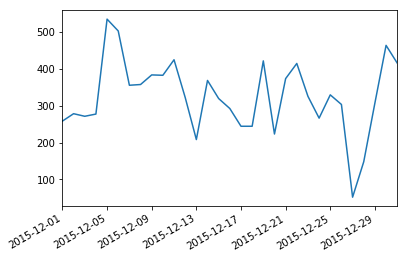

In [125]:
rides_each_month = cycle_df.groupby(['Month','Year'])

for name, group in rides_each_month:
    print(name, len(group))
    if name == (12,2015):
        group['Checkout Date'].value_counts().plot()
    

## Notes
something happened in Austin December 2015 - January 2016

In [466]:
filt_weather_df = weather_df[['Date','TempHighF','TempAvgF','DewPointHighF', 'DewPointAvgF',
                              'WindHighMPH','WindAvgMPH','PrecipitationSumInches','Events']]

#print(day_stats.dtypes)
# filt_weather_df.Events.value_counts()
#merge_df = pd.concat([day_stats, filt_weather_df], join='inner', axis=1)
merge_df = pd.merge(day_stats, filt_weather_df, on='Date')
print(merge_df.dtypes)
merge_df.head()

Date                      datetime64[ns]
Month                              int64
Year                               int64
Weekday                            int64
Avg Trip Duration                float64
Total Rides                        int64
TempHighF                          int64
TempAvgF                           int64
DewPointHighF                     object
DewPointAvgF                      object
WindHighMPH                       object
WindAvgMPH                        object
PrecipitationSumInches            object
Events                            object
dtype: object


,Date,Month,Year,Weekday,Avg Trip Duration,Total Rides,TempHighF,TempAvgF,DewPointHighF,DewPointAvgF,WindHighMPH,WindAvgMPH,PrecipitationSumInches,Events
0,2013-12-21,12,2013,5,29.136,103,74,60,67,49,20,4,0.46,"Rain , Thunderstorm"
1,2013-12-22,12,2013,6,40.462,117,56,48,43,36,16,6,0,
2,2013-12-23,12,2013,0,55.604,96,58,45,31,27,8,3,0,
3,2013-12-24,12,2013,1,31.965,85,61,46,36,28,12,4,0,
4,2013-12-25,12,2013,2,49.297,145,58,50,44,40,10,2,T,


In [467]:
merge_df.Events.replace(' ', 'Sunny', inplace=True)

#merge_df[merge_df.Events == ' '] = 'Sunny'

#I am making the T (trace) equal to 0.01 inches.
merge_df['PrecipitationSumInches'].replace('T',0.005, inplace=True)
# else I can remove them
# merge_df = merge_df[~merge_df['PrecipitationSumInches'].isin(['T'])]

#merge_df.iloc[:,7:12].apply(pd.to_numeric)

"""
Need to figure out how to remove the - from the DewPointHighF column and replace it with the weighted 
mean value
"""

#merge_df.DewPointHighF.value_counts().index
# merge_df[~merge_df['DewPointHighF'].isin(['-'])].DewPointAvgF.astype('int').mean()
# This line above ^ returned a mean of 61.62
# merge_df[~merge_df['DewPointAvgF'].isin(['-'])].DewPointAvgF.astype('int').mean()
# This line above ^ returned a mean of 56.92
# merge_df[~merge_df['WindHighMPH'].isin(['-'])].WindHighMPH.astype('int').mean()
# This line above ^ returned a mean of 13.22
# merge_df[~merge_df['WindAvgMPH'].isin(['-'])].WindAvgMPH.astype('int').mean()
# This line above ^ returned a mean of 5.01



merge_df['DewPointHighF'].replace('-', 62, inplace=True)
merge_df['DewPointAvgF'].replace( '-', 57, inplace=True)
merge_df['WindHighMPH'].replace( '-', 13, inplace=True)
merge_df['WindAvgMPH'].replace('-', 5, inplace=True)

# merge_df.DewPointHighF.value_counts().index

# cols = merge_df.columns[merge_df.dtypes.eq('object')]
# merge_df[cols] = merge_df[cols].apply(pd.to_numeric,axis=1)

#merge_df.iloc[:,7:12] = merge_df.iloc[:,7:12].apply(pd.to_numeric)

cols = merge_df.columns[merge_df.dtypes.eq('object')][:-1]
merge_df[cols] = merge_df[cols].apply(pd.to_numeric)
merge_df.dtypes
#merge_df.head()

Date                      datetime64[ns]
Month                              int64
Year                               int64
Weekday                            int64
Avg Trip Duration                float64
Total Rides                        int64
TempHighF                          int64
TempAvgF                           int64
DewPointHighF                      int64
DewPointAvgF                       int64
WindHighMPH                        int64
WindAvgMPH                         int64
PrecipitationSumInches           float64
Events                            object
dtype: object

In [468]:
precip_bins = [0,0.001, 0.5, 2,10]
merge_df['PrecipBins'] = pd.cut(merge_df.PrecipitationSumInches.astype('float64'), precip_bins,
                                labels=['0','0.1-0.5','0.5-2','2-10'],
                                include_lowest=True
                                )

merge_df.loc[merge_df['PrecipitationSumInches'] == 0.005, ['PrecipitationSumInches','Events']]

,PrecipitationSumInches,Events
4,0.005,Sunny
6,0.005,Sunny
7,0.005,Sunny
42,0.005,Rain
51,0.005,Rain
66,0.005,Rain
95,0.005,Rain
102,0.005,Rain
103,0.005,Sunny
104,0.005,Rain


In [450]:
merge_df.dtypes
# plt.matshow(merge_df.corr())
# plt.show()

Date                      datetime64[ns]
Month                              int64
Year                               int64
Weekday                            int64
Avg Trip Duration                float64
Avg Mode Trip Duration           float64
Total Rides                        int64
TempHighF                          int64
TempAvgF                           int64
DewPointHighF                      int64
DewPointAvgF                       int64
WindHighMPH                        int64
WindAvgMPH                         int64
PrecipitationSumInches           float64
Events                            object
PrecipBins                      category
dtype: object

In [433]:
rides_by_rain = merge_df.groupby(['PrecipBins', 'Weekday'])

print(len(rides_by_rain.groups))
weather_rides = []
for index,(name,group) in enumerate(rides_by_rain):
    print(index%7, name[0],group['Total Rides'].sum())
    weather_rides.append((name[0],group['Total Rides'].sum()))
    
print(weather_rides[0::7])
# .plot(kind='bar',y='Total Rides')
# plt.show()

35
0 0 55131
1 0 52666
2 0 49582
3 0 51157
4 0 71144
5 0 94838
6 0 79933
0 trace 5782
1 trace 3794
2 trace 7227
3 trace 6207
4 trace 12364
5 trace 15401
6 trace 8398
0 0.1-0.5 12767
1 0.1-0.5 9519
2 0.1-0.5 11458
3 0.1-0.5 15735
4 0.1-0.5 13938
5 0.1-0.5 23073
6 0.1-0.5 20478
0 0.5-2 3231
1 0.5-2 2141
2 0.5-2 1374
3 0.5-2 1708
4 0.5-2 4581
5 0.5-2 7433
6 0.5-2 4935
0 2-10 796
1 2-10 323
2 2-10 366
3 2-10 897
4 2-10 160
5 2-10 101
6 2-10 593
[('0', 55131), ('trace', 5782), ('0.1-0.5', 12767), ('0.5-2', 3231), ('2-10', 796)]


## Notes
Rain has a severe impact on how many bikes are checked out from B cycle.  
Even with a little bit of rain you see a sharp decrease in bike checkouts.  
However, once you go over an 1-2 inches of rain the trend associated with the day of the week goes away.  
Saturday actually becomes the least popular day if it rains over 1.5 inches. 


In [462]:
merge_df.head()

,Date,Month,Year,Weekday,Avg Trip Duration,Avg Mode Trip Duration,Total Rides,TempHighF,TempAvgF,DewPointHighF,DewPointAvgF,WindHighMPH,WindAvgMPH,PrecipitationSumInches,Events,PrecipBins
0,2013-12-21,12,2013,5,29.136,5.0,103,74,60,67,49,20,4,0.460,"Rain , Thunderstorm",0.1-0.5
1,2013-12-22,12,2013,6,40.462,4.0,117,56,48,43,36,16,6,0.000,Sunny,0
2,2013-12-23,12,2013,0,55.604,29.0,96,58,45,31,27,8,3,0.000,Sunny,0
3,2013-12-24,12,2013,1,31.965,12.0,85,61,46,36,28,12,4,0.000,Sunny,0
4,2013-12-25,12,2013,2,49.297,16.0,145,58,50,44,40,10,2,0.005,Sunny,0.1-0.5


In [469]:
merge_df.to_csv('./data/cycle_weather_by_day_duration_avg.csv', index=False)

In [386]:
#cycle_df.query('Checkout Kiosk ==  "San Jacinto & 8th Street" and Return Kiosk == "San Jacinto & 8th Street"')

len(cycle_df[(cycle_df['Return Kiosk']   == 'San Jacinto & 8th Street') & 
         (cycle_df['Checkout Kiosk'] == 'San Jacinto & 8th Street') &
         (cycle_df['Checkout Date']  == '2014-03-13')
        ]['Trip Duration Minutes'])

72

In [416]:
#cycle_df.head()
checkout_return_pairs = cycle_df.\
    groupby(
    ['Checkout Date','Checkout Kiosk','Return Kiosk',
     'Trip Duration Minutes']).size().reset_index()\
    .rename(columns={0:'Counts'}) #.value_counts().head(15).plot(kind='bar')

# checkout_return_pairs = checkout_return_pairs\
#     .sort_values('counts', ascending=False).reset_index()

# total_trips = checkout_return_pairs['counts'].sum()

# checkout_return_pairs['freq_%'] = checkout_return_pairs['counts']\
#     .map(lambda x: round(x/total_trips*100,4))

# checkout_return_pairs = checkout_return_pairs.\
#     set_index('freq_%').sort_index(ascending=False)

print(checkout_return_pairs.shape)


# checkout_return_pairs[(checkout_return_pairs['Checkout Date'] == '2014-03-13') &
#                       (checkout_return_pairs['Checkout Kiosk'] == 'San Jacinto & 8th Street') &
#                       (checkout_return_pairs['Return Kiosk'] == 'San Jacinto & 8th Street') 
#                       ]
#checkout_return_pairs.drop('index', axis=1, inplace=True)                     
checkout_return_pairs.sort_values(
    ['Checkout Date', 'Checkout Kiosk', 'Counts'], 
    ascending=[True, True, False], inplace=True)
checkout_return_pairs.rename(
    columns={'Checkout Date': 'Date'}, inplace=True)
checkout_return_pairs.head(100)


# checkout_return_pairs['freq']

(547287, 5)


,Date,Checkout Kiosk,Return Kiosk,Trip Duration Minutes,Counts
0,2013-12-21,2nd & Congress,2nd & Congress,28,2
1,2013-12-21,2nd & Congress,2nd & Congress,33,1
2,2013-12-21,2nd & Congress,4th & Congress,5,1
3,2013-12-21,2nd & Congress,City Hall / Lavaca & 2nd,2,1
4,2013-12-21,2nd & Congress,City Hall / Lavaca & 2nd,9,1
5,2013-12-21,2nd & Congress,City Hall / Lavaca & 2nd,10,1
6,2013-12-21,2nd & Congress,South Congress & James,22,1
7,2013-12-21,2nd & Congress,South Congress & James,23,1
8,2013-12-21,4th & Congress,4th & Congress,90,2
9,2013-12-21,4th & Congress,5th & Bowie,5,1


In [455]:
kiosk_weather_df = pd.merge(checkout_return_pairs, merge_df, how='inner', on='Date')
#kiosk_weather_df['Day Percent Ride'] = kiosk_weather_df.apply(lambda x: round(x['Counts']/x['Total Rides'], 3))
kiosk_weather_df['Day Ride Percentage'] = kiosk_weather_df['Counts']/kiosk_weather_df['Total Rides']

cols = kiosk_weather_df.columns.tolist()
cols = ['Date', 'Month','Year', 'Weekday', 'Total Rides',
 'Checkout Kiosk','Return Kiosk','Trip Duration Minutes','Counts','Day Ride Percentage',
 'TempHighF','TempAvgF',
 'DewPointHighF','DewPointAvgF',
 'WindHighMPH','WindAvgMPH',
 'PrecipitationSumInches','PrecipBins', 
 'Events',]
kiosk_weather_df = kiosk_weather_df[cols]
kiosk_weather_df.head()

,Date,Month,Year,Weekday,Total Rides,Checkout Kiosk,Return Kiosk,Trip Duration Minutes,Counts,Day Ride Percentage,TempHighF,TempAvgF,DewPointHighF,DewPointAvgF,WindHighMPH,WindAvgMPH,PrecipitationSumInches,PrecipBins,Events
0,2013-12-21,12,2013,5,103,2nd & Congress,2nd & Congress,28,2,0.019417,74,60,67,49,20,4,0.46,0.1-0.5,"Rain , Thunderstorm"
1,2013-12-21,12,2013,5,103,2nd & Congress,2nd & Congress,33,1,0.009709,74,60,67,49,20,4,0.46,0.1-0.5,"Rain , Thunderstorm"
2,2013-12-21,12,2013,5,103,2nd & Congress,4th & Congress,5,1,0.009709,74,60,67,49,20,4,0.46,0.1-0.5,"Rain , Thunderstorm"
3,2013-12-21,12,2013,5,103,2nd & Congress,City Hall / Lavaca & 2nd,2,1,0.009709,74,60,67,49,20,4,0.46,0.1-0.5,"Rain , Thunderstorm"
4,2013-12-21,12,2013,5,103,2nd & Congress,City Hall / Lavaca & 2nd,9,1,0.009709,74,60,67,49,20,4,0.46,0.1-0.5,"Rain , Thunderstorm"


In [425]:
kiosk_weather_df.describe()

,Month,Year,Weekday,Total Rides,Trip Duration Minutes,Counts,Day Ride Percentage,TempHighF,TempAvgF,DewPointHighF,DewPointAvgF,WindHighMPH,WindAvgMPH,PrecipitationSumInches
count,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000,547287.000000
mean,5.995386,2015.429583,3.396492,768.824726,30.164495,1.186272,0.002297,83.709688,73.156941,63.359146,58.770672,13.005502,4.942542,0.075012
std,3.087495,1.067549,2.005766,564.588359,93.360695,0.483592,0.002090,11.628935,11.414494,11.293511,12.597246,3.315154,2.021917,0.319100
min,1.000000,2013.000000,0.000000,16.000000,0.000000,1.000000,0.000330,32.000000,29.000000,13.000000,8.000000,6.000000,1.000000,0.000000
25%,3.000000,2015.000000,2.000000,409.000000,8.000000,1.000000,0.001215,77.000000,66.000000,57.000000,51.000000,10.000000,3.000000,0.000000
50%,6.000000,2015.000000,4.000000,571.000000,15.000000,1.000000,0.001938,85.000000,74.000000,66.000000,62.000000,13.000000,5.000000,0.000000
75%,9.000000,2016.000000,5.000000,893.000000,28.000000,1.000000,0.002725,92.000000,83.000000,73.000000,69.000000,15.000000,6.000000,0.005000
max,12.000000,2017.000000,6.000000,3031.000000,21296.000000,33.000000,0.125000,107.000000,93.000000,80.000000,76.000000,29.000000,11.000000,5.200000


In [ ]:
"""
I was trying to make the percent of rides that day but this for loop takes just way too long to compute.
"""

print(checkout_return_pairs[checkout_return_pairs['Checkout Date'] == '2013-12-21']\
    ['counts'])

checkouts_by_day = checkout_return_pairs.groupby('Checkout Date')

for name,group in checkouts_by_day:
    day_total_rides = group['counts'].sum()
    group['trip_freq'] = group['counts'].apply(lambda x: x/day_total_rides)
    #print(name, group['trip_freq'].sum())
    

"""
Figured out another way to do this. I already added it to the df kiosk_weather_df
"""

In [427]:
kiosk_weather_df.to_csv('./data/kiosk_weather_by_day.csv', index=False)